<a href="https://it-omscholing.nl/locaties/hogeschool-rotterdam/">
<div>
<a><img src='../../pics/banner.PNG'/></a>
</div>
<div>
<a href=''><img src='../../pics/miw.PNG'/></a>
</div>
</a>

# Practicum Convolution Neural Nets (CNN) Deel 1

**Doel: Toepassen Convolutional Neural Networks**

### Imports

In [24]:
import matplotlib.pyplot as plt
import torch
import numpy as np
import torchvision
import torchvision.transforms.functional as F
import torchvision.transforms as T
from torchvision.io import ImageReadMode
from torchvision.io import read_image
from torch import nn
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import torch.nn.functional
import os
import math

<h3>Globale variabelen</h3>

In [2]:
forestDirectory = '../../pics/2750/Forest'
industrialDirectory = '../../pics/2750/Industrial'

### Context

<p>
Dit practicum bestaat uit twee onderdelen
<ol>
    <li>Het toepassen van een convolutie en pooling filter</li>
    <li><b>Het bouwen en trainen van een eenvoudig convolutional neural net dat een industrieterrein van een bos kan onderscheiden.</b></li>
</ol>    
Voor beide oefeningen gebruiken we de EuroSAT_RGB dataset
</p>

<img src='../../pics/eurosat_cnn.png' length=65% width=65%>

<h3>Data Collection</h3>
<p>
We gebruiken Images uit de <a href="https://github.com/phelber/EuroSAT">EuroSat dataset</a> die gemaakt zijn met de Sentinel-2 sateliet. Elke image is een 64x64 pixels foto van Europees aardoppervlak op een hoogte van 10 meter. De images zijn te categoriseren in Highway, Industrial, Pasture, PermanentCrop, Residential, River en SeaLake.
</p>
<img src=../../pics/eurosat_overview_small.jpg length=40% width=40%>
<p>
Download <a href="http://madm.dfki.de/files/sentinel/EuroSAT.zip">EuroSAT.zip</a> en kopieer daaruit de directory 2750 naar opdrachten/practica/pics.      
<strong>Voeg het pad naar de directory 2750 toe aan .gitignore zodat je de plaatjes niet naar je remote git repository pusht</strong>
</p>    

## Opdrachten

### Opdracht 3: pooling uitvoeren

Met PyTorch Functional kunnen we ook een pooling filter toepassen.

In [3]:
# use read_image function from torchvision.io to read the image, since I want it in 1-dimensional I set the ImageReadMode to GRAY.
industrial = torchvision.io.read_image(f'{industrialDirectory}/Industrial_1.jpg', ImageReadMode.GRAY).float()
forest = torchvision.io.read_image(f'{forestDirectory}/Forest_1.jpg', ImageReadMode.GRAY).float()

# print(industrial)

# plotfunction
def plotImgs(lImg, rImg):
    plt.style.use('dark_background') 
    plt.rcParams["font.size"] = 10
    plt.rcParams["figure.figsize"] = (10, 7)

    fig, (axL, axR) = plt.subplots(ncols=2, constrained_layout=True)
    
    imL = axL.imshow(lImg.permute(1, 2, 0))
    imR = axR.imshow(rImg.permute(1, 2, 0))

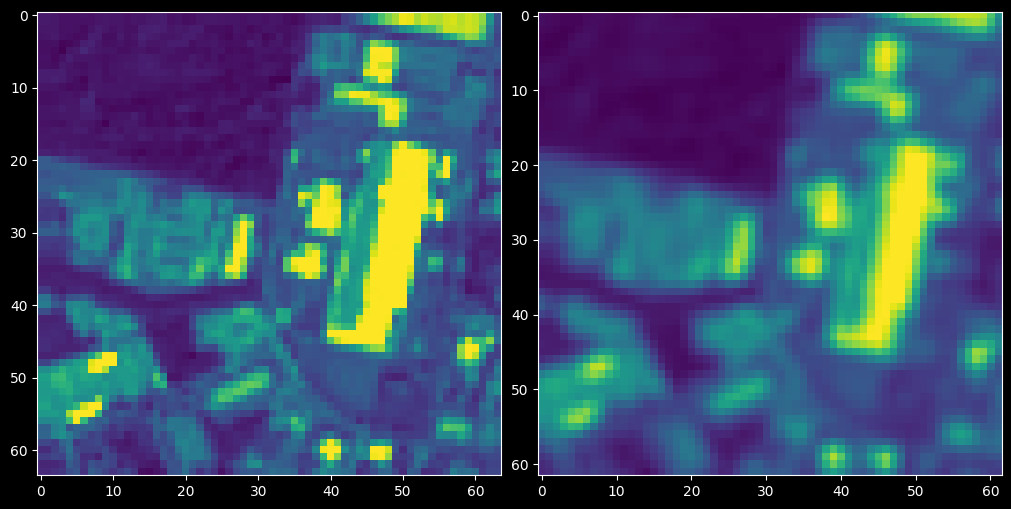

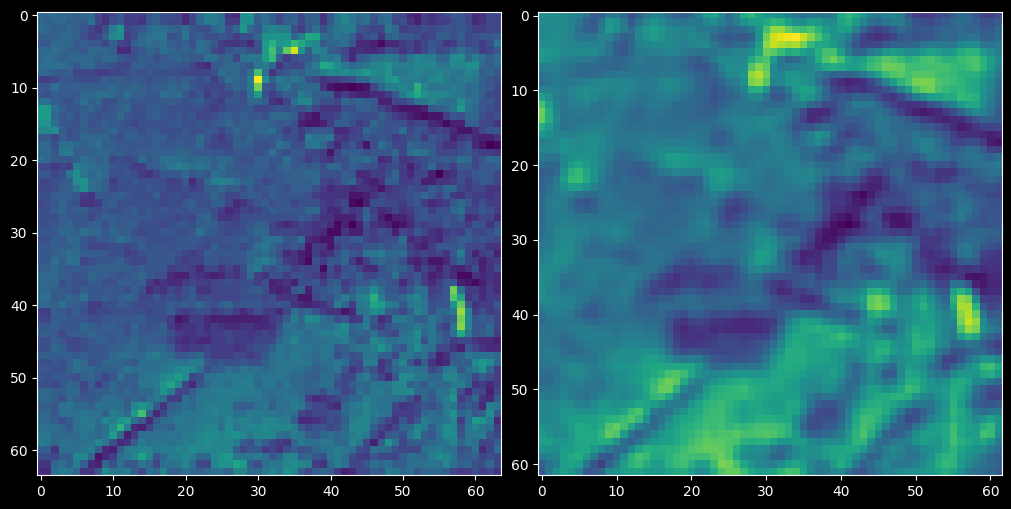

In [4]:
# a. Bekijk de pooling opties en kies de juiste avg-variant
# b. Pas pooling toe op de afbeelding 'Industrial_1.jpg':
#    - Kies een 3x3 kernel en een stride van 1
industrial_avg_pool = torch.nn.functional.avg_pool2d(industrial, kernel_size=3, stride=1)

# c. Herhaal de bovenstaande stappen voor een willekeure Forest Image
forest_avg_pool = torch.nn.functional.avg_pool2d(forest, kernel_size=3, stride=1)

plotImgs(industrial, industrial_avg_pool)
plotImgs(forest, forest_avg_pool)






### Reflectie

Komt de visuele uitkomst overeen met je verwachtingen?

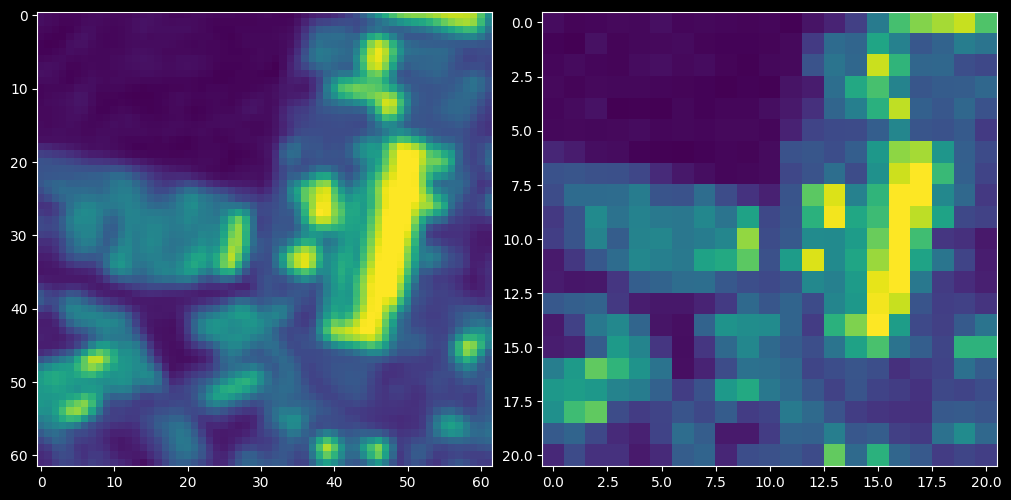

In [5]:
# Extra: varieer de stride en de kernel

# Stride difference (1 and 3)
industrial_avg_pool2 = torch.nn.functional.avg_pool2d(industrial, kernel_size=3, stride=3)

plotImgs(industrial_avg_pool, industrial_avg_pool2)

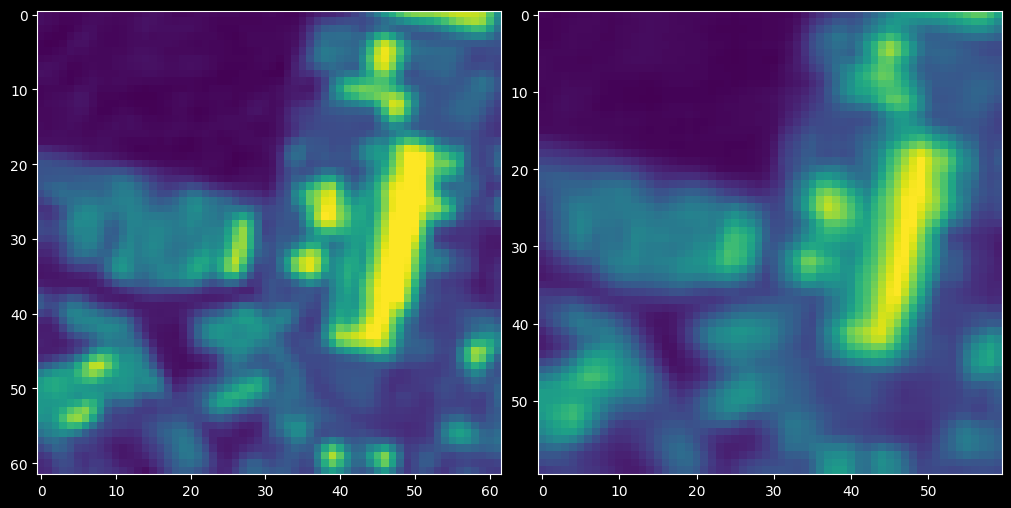

In [6]:
# Kernel difference (3 and 5)
industrial_avg_pool3 = torch.nn.functional.avg_pool2d(industrial, kernel_size=5, stride=1)

plotImgs(industrial_avg_pool, industrial_avg_pool3)

### Reflectie

Wat is de invloed van padding en stride op de uitkomst?

### Opdracht 4: convolutie en pooling combineren

Een convolutional neural net combineert afwisselend convolutie en pooling in de eerste lagen.

We kunnen nu het effect van deze combinatie onderzoeken:

- Convolutie
- Pooling

torch.Size([1, 1, 3, 3])


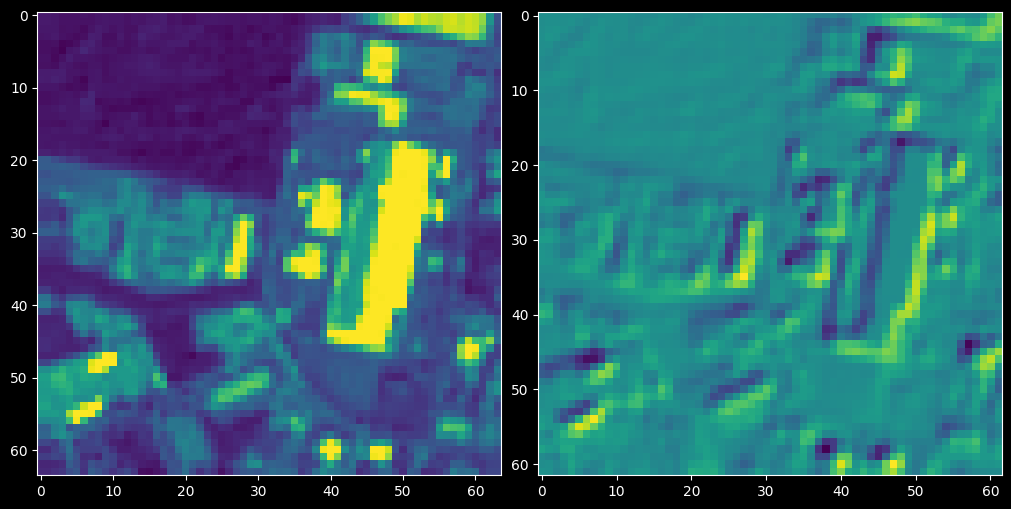

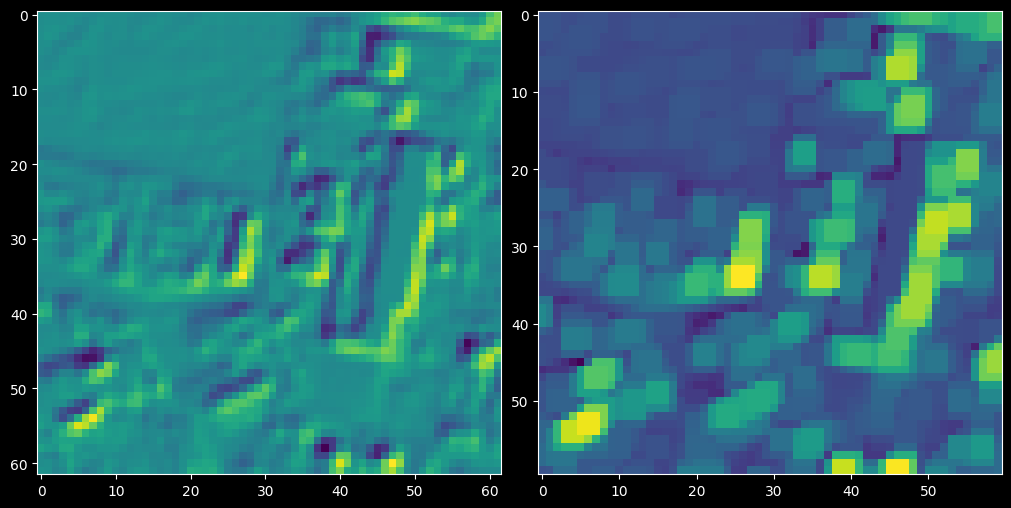

In [7]:
# a. Bedenk en maak zelf een 2d convolution filter
filter = torch.Tensor([
    [
        [1, 1, 0], 
        [1, 0, -1], 
        [0, -1, -1]
    ]
            ]
).unsqueeze(0)

print(filter.shape)

conv = torch.nn.Conv2d(1, 1, kernel_size=3, padding=0, bias=None)

with torch.no_grad():
    conv.weight = nn.Parameter(filter)

# b. Bedenk en maak zelf een 2d pooling filter
def pool_2d(img, kernel, stride, fun="AVG"):

    if fun == "AVG":
        return torch.nn.functional.avg_pool2d(img, kernel_size=kernel, stride=stride)
    elif fun == "MAX":
        return torch.nn.functional.max_pool2d(img, kernel_size=kernel, stride=stride)

# c. Pas nu de convolutie toe op 'Industrial_1.jpg'
industrialFiltered = conv(industrial)
industrialFiltered = torch.Tensor.detach(industrialFiltered)

plotImgs(industrial, industrialFiltered)

# d. Pas vervolgens een pooling toe op de uitkomst van c.
industrialFiltered2 = pool_2d(industrialFiltered, 3, 1, fun="MAX")

plotImgs(industrialFiltered, industrialFiltered2)

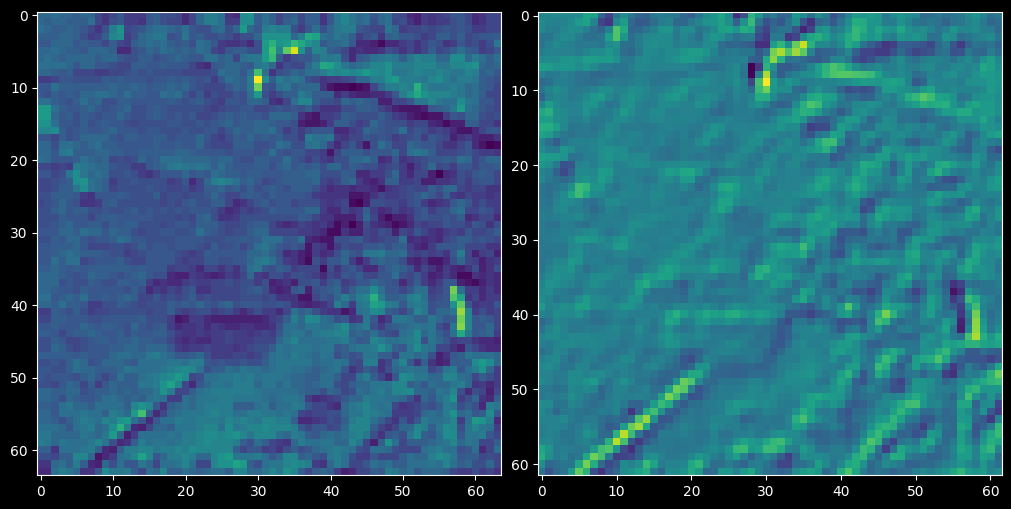

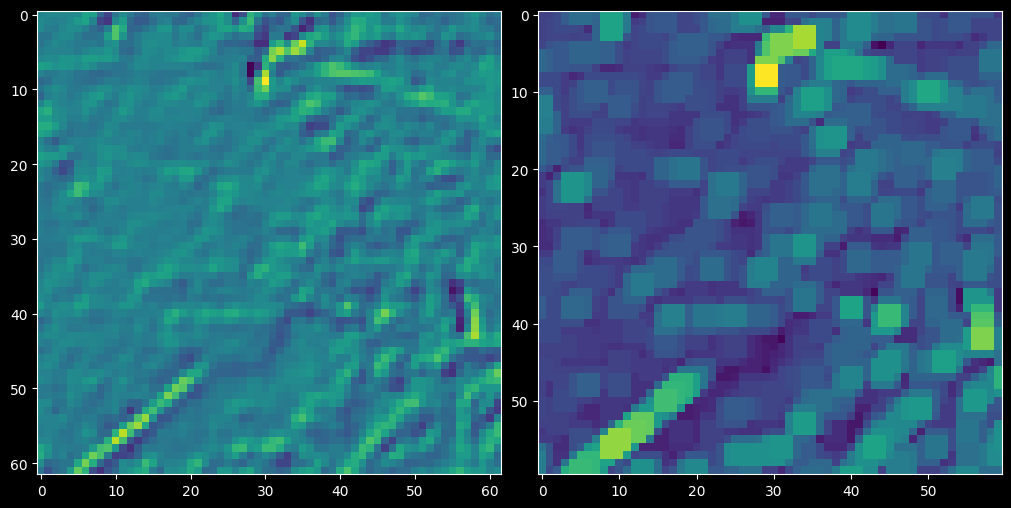

In [8]:
# e. Doe hetzelfde voor de afbeelding 'Forrest_1.jpg'
forestFiltered = conv(forest)
forestFiltered = torch.Tensor.detach(forestFiltered)

plotImgs(forest, forestFiltered)

# pooling
forestFiltered2 = pool_2d(forestFiltered, 3, 1, fun="MAX")
plotImgs(forestFiltered, forestFiltered2)



### Reflectie

- Verschilt de uitkomst veel van de combinatie veel met convolutie en pooling?
- En zijn de afbeeldingen 'Industrial_1.jpg' en 'Forrest_1.jpg' beter te onderscheiden?

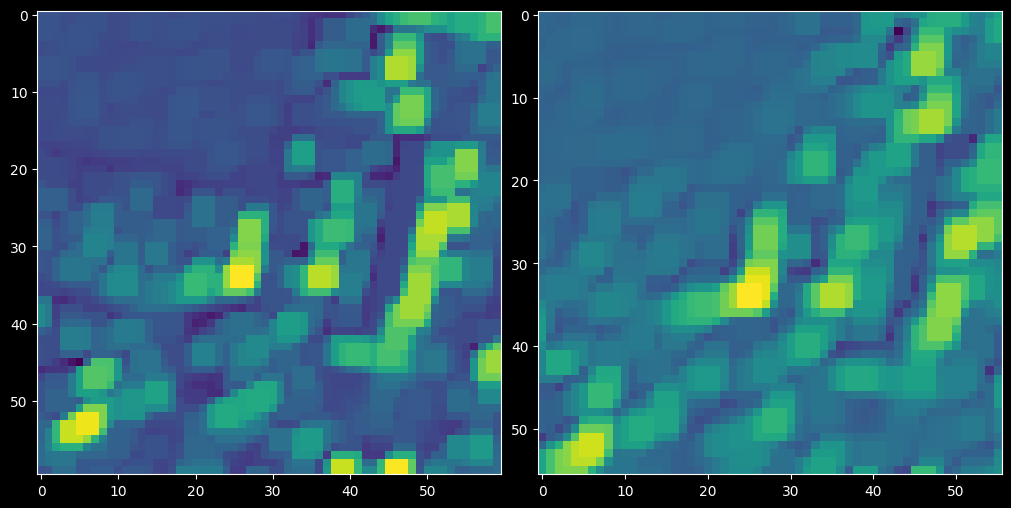

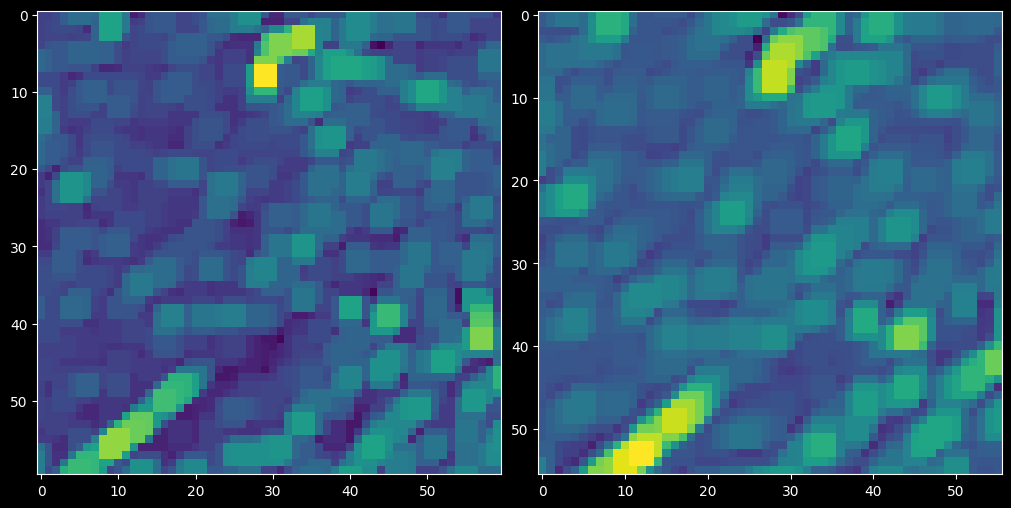

In [9]:
# Extra: bereid de combinatie uit met nog een extra convolutie en pooling laag
forestFiltered2_extra = conv(forestFiltered2)
forestFiltered2_extra = pool_2d(forestFiltered2_extra, 3, 1, fun="MAX")

industrialFiltered2_extra = conv(industrialFiltered2)
industrialFiltered2_extra = pool_2d(industrialFiltered2_extra, 3, 1, fun="MAX")

forestFiltered2_extra = torch.Tensor.detach(forestFiltered2_extra)
industrialFiltered2_extra = torch.Tensor.detach(industrialFiltered2_extra)

plotImgs(industrialFiltered2, industrialFiltered2_extra)
plotImgs(forestFiltered2, forestFiltered2_extra)


### Reflectie

Heeft een extra laag veel invloed op de onderscheidbaarheid van de afbeeldingen?

### Opdracht 5: dataset prepareren

Om het neurale netwerk te trainen moeten we de dataset opsplitsen in labels (Y, de categoriën) en input afbeeldingen (X).

In [10]:
# a. Denk nog eens terug aan hoe we kruisjes van rondjes van elkaar konden onderscheiden

#    - Hoe representeerden we de labels?
#    - Hoe representeerden we de kruisjes en de rondjes?
#    - Hoe combineerden we dit tot een dataset?

# b. Hoe kunnen we de labels 'Industrials' en 'Forrest' dus representeren?
#  antwoord = met 1 en 0
# c. Vorm nu een dataset voor 'Industrials' en 'Forrest'

# d. Extra: implementeer bovenstaande via een Dataset en DataLoader class
#           (zie https://pytorch.org/docs/stable/data.html voor verdere details)

industrialFiles = list()
 
for filename in os.listdir(industrialDirectory):
    imgFile = os.path.join(industrialDirectory, filename)

    if ".jpg" in imgFile:
        industrialFiles.append(imgFile)

forestFiles = list()
 
for filename in os.listdir(forestDirectory):
    imgFile2 = os.path.join(forestDirectory, filename)

    if ".jpg" in imgFile:
        forestFiles.append(imgFile2)

Industrials = list()

for i in industrialFiles:
    Industrials.append(torchvision.io.read_image(i, ImageReadMode.UNCHANGED).float())

Forrest = list()

for i in forestFiles:
    Forrest.append(torchvision.io.read_image(i, ImageReadMode.UNCHANGED).float())


print(industrialFiles)
print(imgFile)

['../../pics/2750/Industrial\\Industrial_1.jpg', '../../pics/2750/Industrial\\Industrial_10.jpg', '../../pics/2750/Industrial\\Industrial_100.jpg', '../../pics/2750/Industrial\\Industrial_1000.jpg', '../../pics/2750/Industrial\\Industrial_1001.jpg', '../../pics/2750/Industrial\\Industrial_1002.jpg', '../../pics/2750/Industrial\\Industrial_1003.jpg', '../../pics/2750/Industrial\\Industrial_1004.jpg', '../../pics/2750/Industrial\\Industrial_1005.jpg', '../../pics/2750/Industrial\\Industrial_1006.jpg', '../../pics/2750/Industrial\\Industrial_1007.jpg', '../../pics/2750/Industrial\\Industrial_1008.jpg', '../../pics/2750/Industrial\\Industrial_1009.jpg', '../../pics/2750/Industrial\\Industrial_101.jpg', '../../pics/2750/Industrial\\Industrial_1010.jpg', '../../pics/2750/Industrial\\Industrial_1011.jpg', '../../pics/2750/Industrial\\Industrial_1012.jpg', '../../pics/2750/Industrial\\Industrial_1013.jpg', '../../pics/2750/Industrial\\Industrial_1014.jpg', '../../pics/2750/Industrial\\Industri

In [34]:
import os
import pandas as pd
from torchvision.io import read_image
from torch.utils.data import Dataset, DataLoader, random_split

from torchvision.datasets import ImageFolder 

# The ImageFolder class in torchvision expects the data to be organized in separate folders,
# where each folder represents a different class

# DIT DOET ALLES MAAR DAN MAKKELIJKER

# dataset_path = "./data/EuroSat/"
# transform = ToTensor()
# dataset = ImageFolder(dataset_path, transform=transform)

# dataset.class_to_idx
# forest_industrial_dataset = torch.utils.data.Subset(dataset, [1,4])

# https://pytorch.org/vision/stable/generated/torchvision.datasets.ImageFolder.html?highlight=imagefolder#torchvision.datasets.ImageFolder


# custom Image Dataset

class CustomImageDataset(Dataset):

    def __init__(self, img_directories):
        self.idx_to_class = {
            0: "industrial",
            1: "forest"
            }

        # create empty lists for image directories and image labels
        self.img_dir = []
        self.img_labels = []

        # loop over image dirs in list
        for dir in img_directories:
            for filename in os.listdir(dir):
                
                # create full filename path
                imgFile = os.path.join(dir, filename)
                
                if ".jpg" in imgFile:
                    # add filename path to img_dir list
                    self.img_dir.append(imgFile)

                # add label to label list
                    label = imgFile.split('/')[4]
                    label = label.split("\\")[0]
                    if label == "Industrial":
                        label_id = 0
                    else:
                        label_id = 1

                    self.img_labels.append(label_id)



    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        # read image from image path
        image = read_image(self.img_dir[idx]).float()
        
        # get label from img label list
        label = self.img_labels[idx]
        return image, label




# create list of image directories

forestDirectory = '../../pics/2750/Forest'
industrialDirectory = '../../pics/2750/Industrial'

image_dirs = [forestDirectory, industrialDirectory]


# create dataset from image directories
dataset = CustomImageDataset(image_dirs)

# create a random generator
generator1 = torch.Generator().manual_seed(13)

# create a train test split with 70% train, 30% test
train_dataset, test_dataset = random_split(dataset, [0.7, 0.3], generator=generator1)

# check length of train and test dataset
print(len(train_dataset), len(test_dataset))

# create train and test dataloaders
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# train_features, train_labels = next(iter(train_dataloader))
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)
test_features, test_labels = next(iter(test_dataloader))


print(test_features[0], test_labels[0])

3850 1650
tensor([[[39., 38., 38.,  ..., 34., 37., 39.],
         [37., 37., 38.,  ..., 34., 35., 37.],
         [37., 36., 36.,  ..., 36., 37., 37.],
         ...,
         [37., 37., 37.,  ..., 37., 36., 37.],
         [37., 36., 37.,  ..., 34., 36., 46.],
         [37., 37., 40.,  ..., 36., 39., 55.]],

        [[63., 62., 62.,  ..., 56., 57., 58.],
         [64., 64., 62.,  ..., 56., 57., 59.],
         [64., 63., 60.,  ..., 60., 59., 59.],
         ...,
         [59., 59., 59.,  ..., 61., 60., 61.],
         [59., 60., 62.,  ..., 59., 59., 66.],
         [61., 62., 65.,  ..., 61., 62., 74.]],

        [[73., 74., 74.,  ..., 67., 68., 72.],
         [73., 73., 74.,  ..., 67., 68., 70.],
         [71., 72., 70.,  ..., 70., 70., 70.],
         ...,
         [70., 70., 70.,  ..., 71., 70., 73.],
         [70., 70., 69.,  ..., 66., 67., 75.],
         [71., 69., 70.,  ..., 66., 68., 81.]]]) tensor(1)


In [12]:
len(train_dataloader.dataset.indices)

3850

### Opdracht 6: CNN ontwerpen

We kunnen een convolutional neural net opbouwen met convolutie, pooling en fully connected lagen. Hieronder definiëren we een topologie om een afbeeldingen van 32 x 32 te onderscheiden.

De topologie is gebaseerd op de blog post 'A simple CNN with Pytorch'. Dus zie het artikel voor extra details.

In [13]:
#-------------------------------------------------------

class CNN(nn.Module):
    
    #-------------------------------------------------------
    
    def __init__(self):
        
        # Because we inherit from Module base class
        super().__init__()
        
        
       

        # RGB input, 6 filters, kernel of 5 x 5
        self.conv1 = nn.Conv2d(3, 6, 5)
        
        # Filter is 2 x 2 with a stride of 2 (defined once, used two times)
        self.pool = nn.MaxPool2d(2, 2)
        
        # in_channels = 6 because self.conv1 output has 6 channels
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        # Fully connected layer matched on output of conv2 layer
        self.fc1 = nn.Linear(16 * 13 * 13, 120)

        # Adding dropout
        # self.dropout = nn.Dropout(0.9)
        
        # Fully connected layer
        self.fc2 = nn.Linear(120, 84)
        
        # We only have 2 labels
        self.fc3 = nn.Linear(84, 2)
        
    #-------------------------------------------------------
        
    def forward(self, x):
        
        # Convolution with relu layers
        x = self.pool(torch.nn.functional.relu(self.conv1(x)))
        x = self.pool(torch.nn.functional.relu(self.conv2(x)))
        
        # To match the output of the conv2 layer onto the first fully connected layer
        # Like reshape() but makes no copy (reuses underlaying data)
        x = x.view(-1, 16 * 13 * 13)
        
        # Fully connected layers
        x = torch.nn.functional.relu(self.fc1(x))
        # x = self.dropout(x)
        x = torch.nn.functional.relu(self.fc2(x))
        
        # No activation on final layer 
        return self.fc3(x)

#-------------------------------------------------------

### Opdracht 7: CNN trainen

Het trainen van een CNN is identiek aan het trainen van een fully connected (a.k.a. dense) netwerk.

In [35]:
# a. Ga voor jezelf na welke stappen een typisch trainingsproces bevat

# b. Bekijk de blog post 'A simple CNN in Python' en zet de training op

# c. Het voorbeeld bevat geen validatie tijdens de trainingsstap (epoch)

#    - Bekijk het Notebook met de de postcode FastScan
#      en bereid de training uit met validatie in de trainingsloop

def evaluate_accuracy(logits, y_true):
    
    # get index with the largest logit value PER OBSERVATION
    _, y_pred = torch.max(logits, dim=1)
    # calculate proportion of correct prediction
    correct_pred = (y_pred == y_true).float()
    acc = correct_pred.sum() / len(correct_pred)

    return acc * 100

import torch.optim as optim

net = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

running_loss = 0 
printfreq = 10
for epoch in range(2):
    for i, data in enumerate(train_dataloader):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)  # forward pass 
        loss = criterion(outputs, labels) # calculate loss
        loss.backward() # calculate gradients (training)
        optimizer.step() # update weights of cnn

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            running_loss = 0
    
    
    # disable gradient calculation
    with torch.no_grad():
        # initialize tracker for validation performance
        val_acc = 0
        val_loss = 0

        # prepare model for evaluation
        net.eval()

        # loop for each batch
        for data, target in test_dataloader:
            # STEP 1: forward pass
            output = net(data)
            # STEP 2: calculate the loss
            loss = criterion(output, target)
            # STEP 3: accumulate validation loss and accuracy
            acc = evaluate_accuracy(output, target)
        
        print(acc)

0 10 0.6523281246423721
0 20 0.08681700788438321
0 30 0.039561694883741436
0 40 0.03247287445701659
0 50 0.03687558003002778
0 60 0.04278229175688466
tensor(100.)
1 10 0.03618746789870784
1 20 0.015194427059032022
1 30 0.002731205045711249
1 40 0.012221338905510493
1 50 0.0065329993172781545
1 60 0.01633274958585389
tensor(100.)


### Opdracht 8: dropout toevoegen

Om het netwerk effectiever te trainen wordt dropout toegepast.

PyTorch maakt het toevoegen van dropout makkelijk.

In [ ]:
# a. Bekijk het artikel Using Dropout Regularization in PyTorch Models (zie sources)

# b. Pas nu dropout toe op een hidden layer van je model

# c. Hertrain je model

#    - Let er op dat je je model evalueert in eval() mode
#    - Heeft de dropout invloed op de accuracy van je model

# maakt in dit geval weinig verschil, zelfs met een dropout van 0.9.


### Reflectie

- Wat gebeurt er als de dropout groot is (bijvoobeeld 0.9)?

### Bronnen

[EuroSAT project](https://github.com/phelber/eurosat)

[Pytorch Neural Nets](https://pytorch.org/docs/stable/nn.html)

[Kernels](https://en.wikipedia.org/wiki/Kernel_(image_processing))

[A simple CNN with Pytorch](https://tomroth.com.au/pytorch-cnn)

[A guide to convolution arithmetic for deep learning](https://arxiv.org/pdf/1603.07285.pdf)

[Using Dropout Regularization in PyTorch Models](https://machinelearningmastery.com/using-dropout-regularization-in-pytorch-models)